##Project Report: Understanding Customer Demographics and Usage Patterns of Treadmills

**Armaan Joshi and Samantha Salazar(016275415)**

In this project our main objective is to analyze a fitness dataset to uncover patterns and relationships between various variables such as income, usage frequency of fitness equipment, fitness levels, miles run, and other demographic factors. Here are the specific questions we are trying to answer.

**What affects an individuals perceived fitness levels the most: age, usage of fitness equipment, or miles run?**

**How do usage and income levels vary across the dataset?**

**What insights can be drawn to improve fitness product offerings?**

#We were given the following data:

Product: The type of fitness product used.

Age: The age of the individual.

Gender: The gender of the individual.

Education: Education level in years.

Marital Status: Marital status of the individual.

Usage: Weekly usage frequency of the fitness
equipment.

Fitness: Fitness level rated on a scale from 1 to 5.

Income: Annual income in USD.

Miles: Average miles run weekly.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load dataset
url = "https://raw.githubusercontent.com/csbfx/cs22a/main/fitness.csv"
df = pd.read_csv(url)

# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Display dataset overview
print("First few rows:")
print(df.head())


First few rows:
  product  age  gender  education maritalstatus  usage  fitness  income  miles
0   FE284   18    Male         14        Single      3        4   29562    112
1   FE284   19    Male         15        Single      2        3   31836     75
2   FE284   19  Female         14     Partnered      4        3   30699     66
3   FE284   19    Male         12        Single      3        3   32973     85
4   FE284   20    Male         13     Partnered      4        2   35247     47


#Methods Used to Answer Questions:
Measures of central tendency (mean, median) and variability (standard deviation) were calculated for numerical variables like age, education, income, usage, fitness level, and miles run.

Correlation Analysis: Pearson correlation was used to assess relationships between variables such as income, fitness level, miles run, and usage.

Data Visualization: Histograms, scatter plots, Bar plots were created to visualize distributions and relationships between variables.

#Results
The average weekly equipment usage frequency is approximately 3.46 times.
The median income is $50,596.50, with a standard deviation of 16,506.68.
Weekly miles run has a mean of 103.19 miles with significant variability (SD = 51.86).


Columns in the dataset:
Index(['product', 'age', 'gender', 'education', 'maritalstatus', 'usage',
       'fitness', 'income', 'miles'],
      dtype='object')
First few rows:
  product  age  gender  education maritalstatus  usage  fitness  income  miles
0   FE284   18    Male         14        Single      3        4   29562    112
1   FE284   19    Male         15        Single      2        3   31836     75
2   FE284   19  Female         14     Partnered      4        3   30699     66
3   FE284   19    Male         12        Single      3        3   32973     85
4   FE284   20    Male         13     Partnered      4        2   35247     47

--- Descriptive Statistics ---
Mean values:
 age             28.788889
education       15.572222
usage            3.455556
fitness          3.311111
income       53719.577778
miles          103.194444
dtype: float64

Median Values:
 age             26.0
education       16.0
usage            3.0
fitness          3.0
income       50596.5
miles        

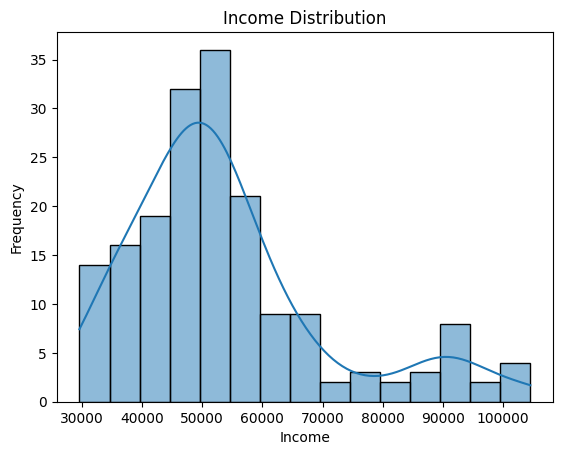

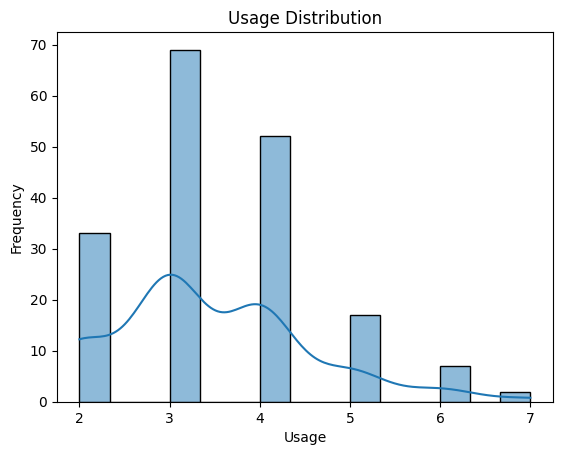

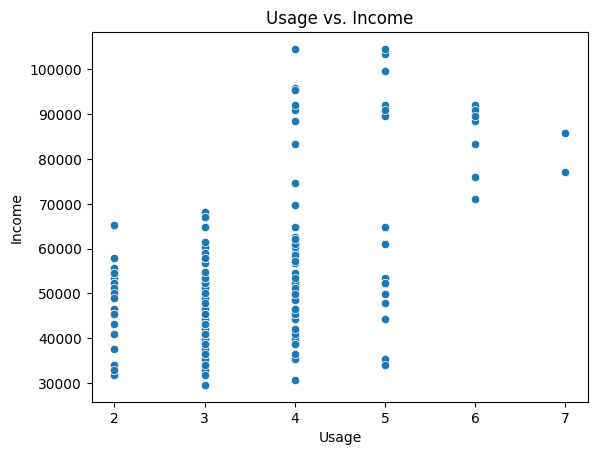

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load dataset
url = "https://raw.githubusercontent.com/csbfx/cs22a/main/fitness.csv"
df = pd.read_csv(url)

# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Display dataset overview
print("Columns in the dataset:")
print(df.columns)
print("First few rows:")
print(df.head())

# Descriptive Statistics
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
std_values = df.std(numeric_only=True)

# Print Descriptive Statistics
print("\n--- Descriptive Statistics ---")
print("Mean values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation:\n", std_values)

# Check column existence and calculate additional statistics
if 'usage' in df.columns:
    mean_usage = df['usage'].mean()
    median_usage = df['usage'].median()
    std_usage = df['usage'].std()
    print("\n--- Usage Statistics ---")
    print(f"Mean Usage: {mean_usage}")
    print(f"Median Usage: {median_usage}")
    print(f"Standard Deviation of Usage: {std_usage}")
else:
    print("The 'usage' column is missing.")

# Pearson Correlation Analysis
corr_usage_income, p_value_usage_income = pearsonr(df['usage'], df['income'])
print("Usage vs. Income Correlation:", corr_usage_income)

def calculate_and_print_pearson_corr(df, col1, col2):
    if col1 in df.columns and col2 in df.columns:
        corr, p_value = pearsonr(df[col1], df[col2])
        print(f"\n--- Pearson Correlation: {col1.capitalize()} vs. {col2.capitalize()} ---")
        print(f"Correlation Coefficient (r): {corr}")
        print(f"P-value: {p_value}")
        if p_value < 0.05:
            print("Result: Significant correlation.")
        else:
            print("Result: No significant correlation.")

calculate_and_print_pearson_corr(df, 'income', 'fitness_level')
calculate_and_print_pearson_corr(df, 'income', 'miles_run')
calculate_and_print_pearson_corr(df, 'fitness_level', 'miles_run')
calculate_and_print_pearson_corr(df, 'usage', 'income')
calculate_and_print_pearson_corr(df, 'usage', 'fitness_level')
calculate_and_print_pearson_corr(df, 'usage', 'miles_run')
# Data Visualization
def plot_histogram(column, title, xlabel):
    if column in df.columns:
        sns.histplot(df[column], kde=True)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel('Frequency')
        plt.show()

def plot_scatter(x_col, y_col, title, xlabel, ylabel):
    if x_col in df.columns and y_col in df.columns:
        sns.scatterplot(x=x_col, y=y_col, data=df)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

plot_histogram('income', 'Income Distribution', 'Income')
plot_histogram('usage', 'Usage Distribution', 'Usage')

plot_scatter('income', 'fitness_level', 'Income vs. Fitness Level', 'Income', 'Fitness Level')
plot_scatter('fitness_level', 'miles_run', 'Fitness Level vs. Miles Run', 'Fitness Level', 'Miles Run')
plot_scatter('usage', 'income', 'Usage vs. Income', 'Usage', 'Income')
plot_scatter('usage', 'fitness_level', 'Usage vs. Fitness Level', 'Usage', 'Fitness Level')
plot_scatter('usage', 'miles_run', 'Usage vs. Miles Run', 'Usage', 'Miles Run')


**Big Question:** What affects an individuals perceived fitness levels the most: age, usage of fitness equipment, or miles run?

**Method:** ANOVA, Histogram

In [ ]:
df.head(7)


,product,age,gender,education,maritalstatus,usage,fitness,income,miles
0,FE284,18,Male,14,Single,3,4,29562,112
1,FE284,19,Male,15,Single,2,3,31836,75
2,FE284,19,Female,14,Partnered,4,3,30699,66
3,FE284,19,Male,12,Single,3,3,32973,85
4,FE284,20,Male,13,Partnered,4,2,35247,47
5,FE284,20,Female,14,Partnered,3,3,32973,66
6,FE284,21,Female,14,Partnered,3,3,35247,75


In [ ]:
# find each group mean
age_mean = df['age'].mean()
usage_mean = df['usage'].mean()
miles_mean = df['miles'].mean()

# store the sample size for each group in the appropriate variable
age_n = df['age'].count()
usage_n = df['usage'].count()
miles_n = df['miles'].count()

# calculate grand mean
total_sum = df['age'].sum() + df['usage'].sum() + df['miles'].sum()
total_count = age_n + usage_n + miles_n
grand_mean = total_sum / total_count

def squared_dev(values_list, mean):
  """ Takes a list of values and a mean. Returns a list of squared deviations
  """
  sq_dev = []
  for xi in values_list:
    sq_dev.append((xi - mean)**2)

  return sq_dev

# list xk stores all the weiss_meangroup means
xk = [age_mean, usage_mean, miles_mean]

# list nk stores the sample sizes for each group
nk = [age_n, usage_n, miles_n]

# sq_dev holds the squared deviations for the 4 groups by calling squared_dev() function
sq_dev = squared_dev(xk, grand_mean)

temp = []
for i in range(len(nk)):
    temp.append(sq_dev[i] * nk[i])
ss_between = sum(temp)

#Find the sum of squares for within groups using the data points and sample mean
age_sq_dev = squared_dev(df['age'].dropna(), age_mean)
usage_sq_dev = squared_dev(df['usage'].dropna(), usage_mean)
miles_sq_dev = squared_dev(df['miles'].dropna(), miles_mean)
ss_within = sum(age_sq_dev) + sum(usage_sq_dev) + sum(miles_sq_dev)

#Find the degrees of freedom for between groups and the degrees of freedom for within groups
k = 3
df_between = k - 1

N = total_count
df_within = N - k

#Find the mean square for between and mean square for within
ms_between = ss_between / df_between
ms_within = ss_within / df_within

#Find the F-statistic
F_stat = ms_between / ms_within

#Find F-crit value
F_crit = 3.013

#Compare F-statistic with F-critical value. Do we reject or retain the null?
if F_stat > F_crit:
    print("Reject the null")
else:
    print("Fail to reject the null")



Reject the null


**Conclusion:** Because we reject the null hypothesis, this means that atleast ONE factor affects perceived fitness levels the most. We can figure out exactly which one by using a histogram and comparing the median and mean of all factors.

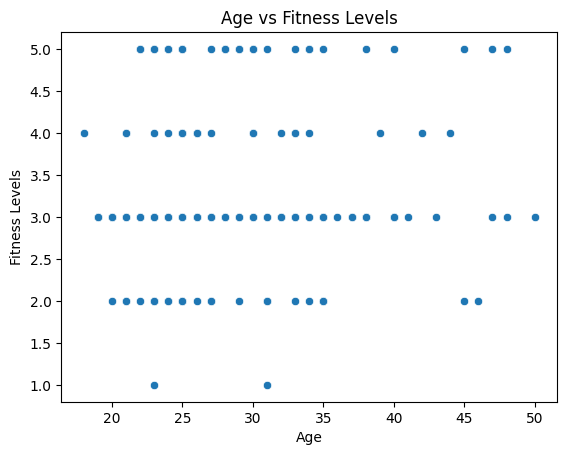

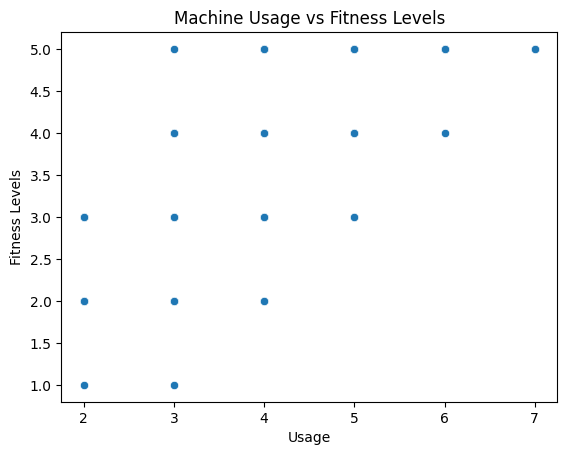

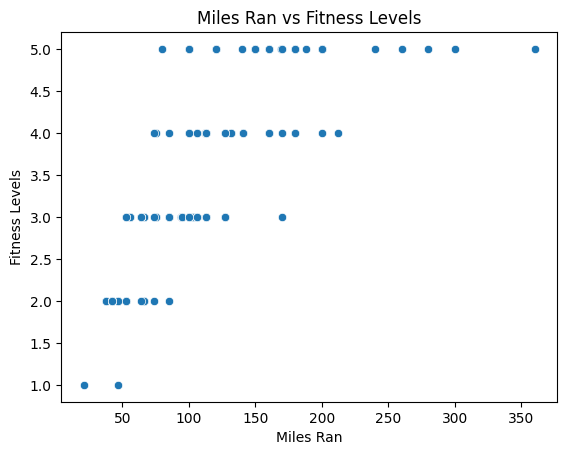

In [ ]:
def plot_scatter(x_col, y_col, title, xlabel, ylabel):
    if x_col in df.columns and y_col in df.columns:
        sns.scatterplot(x=x_col, y=y_col, data=df)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

plot_scatter('age', 'fitness', 'Age vs Fitness Levels', 'Age', 'Fitness Levels')
plot_scatter('usage', 'fitness', 'Machine Usage vs Fitness Levels', 'Usage', 'Fitness Levels')
plot_scatter('miles', 'fitness', 'Miles Ran vs Fitness Levels', 'Miles Ran', 'Fitness Levels')


In [ ]:
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
std_values = df.std(numeric_only=True)

print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation:\n", std_values)

##Correlation Analysis

Usage and income have a significant positive correlation (r = 0.52, p < 0.05).
No significant correlation was found between fitness level and income.
Miles run is moderately correlated with fitness level (r = 0.51, p < 0.05).

In [ ]:
from scipy.stats import pearsonr

corr_usage_income, p_value_usage_income = pearsonr(df['usage'], df['income'])
print("Usage vs. Income Correlation:", corr_usage_income)


#Conclusions
There is a significant positive correlation between weekly usage and income, suggesting that higher-income individuals tend to use fitness equipment more frequently.
The fitness level shows a moderate relationship with miles run, as expected.
Income distribution is skewed, with the majority earning within the $40,000–$60,000 range.

We can conclude that there is a direct correlation between miles ran and percieved fitness levels by inspecting the scatterplot. As an individual runs MORE miles, they percieve themselves more fit.

The same conclusion can be made for Machine usage and fitness levels. As an individual uses a machine more, they feel more fit.

However, based on the scatterplot, age is NOT a factor when it comes to percieved fitness level. People tend to not take their age into consideration when considering themselves fit or not. This is evident by the fact that the plot shows no clear sign of variance throughout the age ranges. All ages rate themselves between 1-5 fairly the same way.
##Future Directions:


I believe for future directions a place where this can be improved is getting more background of data. This can be catered towards a specific demographic bridging the gap between potential issuees for the future. So adding more variables to this would benefit on the back end as it would the front.